In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from sklearn.cluster import k_means, kmeans_plusplus, KMeans
from sklearn.decomposition import PCA
import math 
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler

In [2]:
#Display multiple digits
def showDigits(digits, labels, indexes, size=28):
    #Make a grid that is the right size
    pics = len(indexes)
    cols = 6
    rows = math.ceil(pics/cols)
    fig, axes = plt.subplots(rows, cols, figsize=(14,6))
    plt.axis("off")

    #loop through the list of indexes, grab images and labels, plot in the "next" spot. 
    for i in range(0, pics):
        n = indexes[i]
        some_digit = digits[n:n+1]
        some_digit_image = np.array(some_digit).reshape(size, size)
        ax = axes[i//cols, i%cols]
        ax.axis("off")
        ax.imshow(some_digit_image, cmap=mpl.cm.binary)
        ax.set_title('Ind: {} - Lbl: {}'.format(indexes[i], labels[i]))
    plt.tight_layout()
    plt.axis("off")
    plt.show()

KeyError: 0

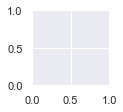

In [63]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist["data"]

# Normalize the data
X_norm = X / 255.0

# Train the k-means model with improved hyperparameters
kmeans = KMeans(n_clusters=20, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(X_norm)

# Get the cluster labels and centers
clusters = kmeans.labels_
centers = kmeans.cluster_centers_

# Reshape the centers to 28x28 images
centers = centers.reshape(20, 28, 28)

# Define your preferred labels
my_labels = ['3', '1', '5', '9', '2', '4', '6', '7', '8', '0', '3', '1', '5', '9', '2', '4', '6', '7', '8', '0']

# Assign the preferred labels to the clusters
for i in range(20):
    cluster_data = X[clusters == i]
    cluster_labels = [my_labels[i]] * len(cluster_data)
    if len(cluster_labels) > 0:
        plt.figure(figsize=(8, 8))
        for j in range(min(25, len(cluster_data))):
            plt.subplot(5, 5, j+1)
            plt.imshow(cluster_data[j].reshape(28, 28), cmap='binary')
            plt.axis('off')
            plt.title(cluster_labels[j])
        plt.show()

    print(f"Cluster {i} contains {len(cluster_data)} digits with label {my_labels[i]}")

In [64]:
#Load Data
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
#mnist = mnist[0:15000]
X = mnist["data"]
print(X.shape)

(70000, 784)


In [65]:
#Data normalization
X = mnist["data"]/255.0

In [71]:
kmeans=KMeans(n_clusters=10, random_state=42)
clusters=kmeans.fit_predict(X)
centers=kmeans.cluster_centers_
centers.shape

(10, 784)

In [32]:
testdf=pd.DataFrame(X)
testdf['cluster']=clusters
testdf.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,cluster
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


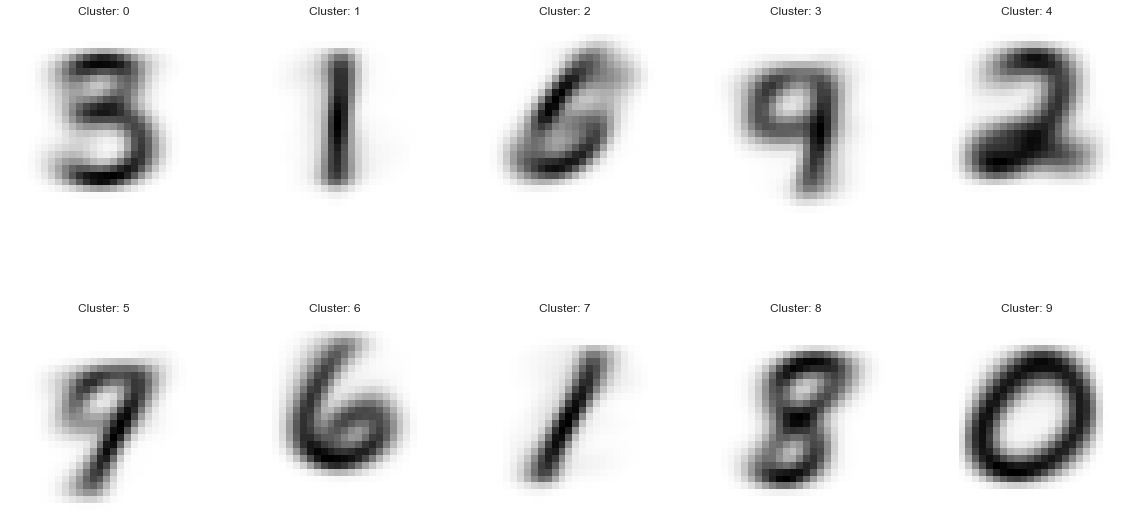

In [73]:
centers = centers.reshape(10,28,28)
labels = kmeans.labels_
# Obtain the unique cluster labels
unique_labels = np.unique(labels)

fig, ax = plt.subplots(2, 5, figsize=(20, 10))

for axi,label in zip(ax.flat,unique_labels):

    # Find the indices of images that belong to the current cluster label
    indices = np.where(labels == label)[0]
    # Select the center of the current cluster
    center = centers[label]
    axi.set(xticks=[], yticks=[], title='Cluster: '+str(label))
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

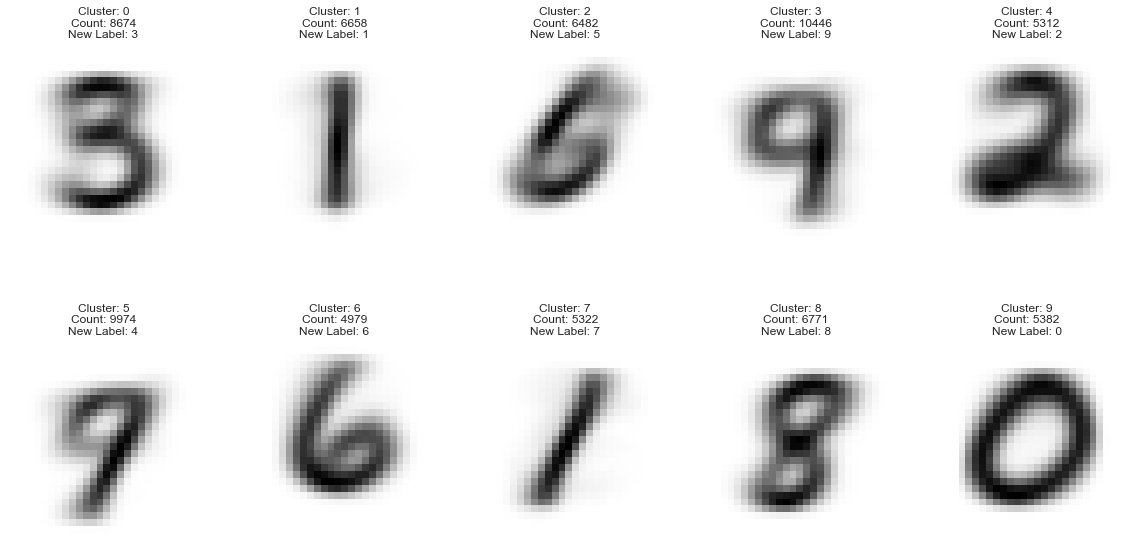

In [77]:
#Assign my labels and draw the digits 
fig, ax=plt.subplots(2,5, figsize=(20,10))

#my prefered labels
mapped_labels={0:'3',1:'1',2:'5',3:'9',4:'2',5:'4',6:'6',7:'7',8:'8',9:'0'}

unique_labels, counts = np.unique(labels, return_counts=True)

for axi,label in zip(ax.flat,unique_labels):

    # Find the indices of images that belong to the current cluster label
    indices = np.where(labels == label)[0]
    # Select the center of the current cluster
    center = centers[label]
    
    # Replace the cluster label with the preferred label
    new_label = mapped_labels[label]

    axi.set(xticks=[], yticks=[], title='Cluster: '+str(label)+'\nCount: '+str(counts[label])+'\nNew Label: '+new_label)
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)



In [86]:
for i in range(10):
    cluster_data = X[clusters== i]
    print(f"Cluster {mapped_labels[i]} data shape: {cluster_data.shape}")

Cluster 3 data shape: (8674, 784)
Cluster 1 data shape: (6658, 784)
Cluster 5 data shape: (6482, 784)
Cluster 9 data shape: (10446, 784)
Cluster 2 data shape: (5312, 784)
Cluster 4 data shape: (9974, 784)
Cluster 6 data shape: (4979, 784)
Cluster 7 data shape: (5322, 784)
Cluster 8 data shape: (6771, 784)
Cluster 0 data shape: (5382, 784)


In [78]:
from sklearn.mixture import GaussianMixture

models = []
for label in unique_labels:
    data = X[labels == label]
    model = GaussianMixture(n_components=1, covariance_type='full').fit(data)
    models.append(model)

In [83]:
def generate_digit(model):
    # Sample a new point from the GMM model
    new_point = model.sample()[0][0]
    # Scale the new point to range [0, 255]
    new_point = np.clip(new_point * 255, 0, 255).astype(int)
    # Reshape the new point to 28x28 image
    new_digit = new_point.reshape(28, 28)
    return new_digit

In [84]:
new_digits = []
for model in models:
    new_digit = generate_digit(model)
    new_digits.append(new_digit)